# Diffusion Curvature of Single-Cell Data

::: {#2d651c64-c405-4ba6-be8e-e50b9f1499e8 .cell 0=‘d’ 1=‘e’ 2=‘f’ 3=‘a’
4=‘u’ 5=‘l’ 6=‘t’ 7=‘*’ 8=’e’ 9=’x’ 10=’p’ 11=’ ’ 12=’b’ 13=’e’ 14=’n’
15=’c’ 16=’h’ 17=’m’ 18=’a’ 19=’r’ 20=’k’ 21=’i’ 22=’n’ 23=’g’ 24=’.’
25=’s’ 26=’i’ 27=’n’ 28=’g’ 29=’l’ 30=’e’ 31=’*’ 32=‘c’ 33=‘e’ 34=‘l’
35=‘l’ 36=’ ’ 37=‘h’ 38=‘i’ 39=‘d’ 40=‘e’ scrolled=‘true’
execution_count=1}

``` python
## Standard libraries
import os
import math
import numpy as np
import time
from fastcore.all import *
from nbdev.showdoc import *

# ## Imports for plotting
# import matplotlib.pyplot as plt
## Progress bar
from tqdm.auto import tqdm, trange

from functools import partial

## project specifics
import diffusion_curvature
import pygsp
import jax
import jax.numpy as jnp
from diffusion_curvature.core import *
from diffusion_curvature.utils import *
# from diffusion_curvature.comparison_space import *
from diffusion_curvature.kernels import *

%load_ext autoreload
%autoreload 2
    
jax.devices()
# jax.default_device = jax.devices("cpu")
```

    [CpuDevice(id=0)]

:::

In [2]:

import numpy as np
import codecs, json

def load_json_files(file_path):
    '''
    Loads data from a json file

    Inputs:
        file_path   the path of the .json file that you want to read in

    Outputs:
        json_data    this is a numpy array if data is numeric, it's a list if it's a string

    '''

    #  load data from json file
    with codecs.open(file_path, 'r', encoding='utf-8') as handle:
        json_data = json.loads(handle.read())

    # if a string, then returns list of strings
    if not isinstance(json_data[0], str):
        # otherwise, it's assumed to be numeric and returns numpy array
        json_data = np.array(json_data)

    return json_data

In [3]:
ipsc_points = load_json_files("../data/raw/ipsc_data.json")

In [4]:
ipsc_points.shape

(2005, 33)

In [5]:
X = ipsc_points

In [7]:
kernel, ns = tune_curvature_agnostic_kernel(X, 120, tolerance = 5, max_iterations = 100, alpha = 0)

With local dimension estimation

In [9]:
DC = DiffusionCurvature(
    graph_former = kernel,
    smoothing = 1,
    estimate_local_dimension=True,
)

In [10]:
ks_edc = DC.fit(X, ts = list(range(1,40)), locality_scale = 0.9) 

Estimated dimension(s) in point cloud: {np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30), np.int64(31)}

In [12]:
np.save("../results/ipsc_diffusion_curvature", ks_edc)

With global dimension estimation

In [8]:
DC = DiffusionCurvature(
    graph_former = kernel,
    smoothing = 1,
    estimate_local_dimension=False,
)

In [9]:
ks_edc = DC.fit(X, ts = list(range(1,40)), locality_scale = 0.9) 

Estimated dimension(s) in point cloud: {11}

In [10]:
np.save("../results/ipsc_diffusion_curvature_global_dim", ks_edc)

In [10]:
import umap
umap_op = umap.UMAP()
X_umap = umap_op.fit_transform(X)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.

In [11]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Diffusion Curvature of the iPSC Dataset')

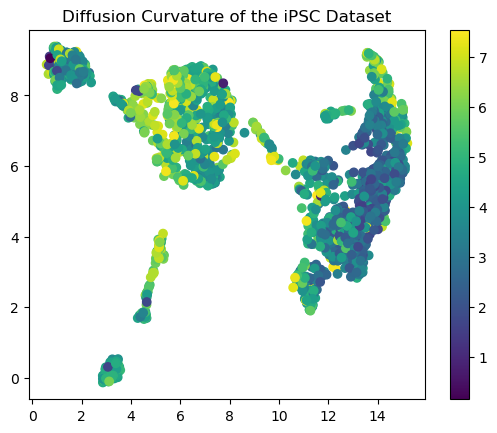

In [12]:
plt.scatter(X_umap[:,0], X_umap[:,1],c=ks_edc)
plt.colorbar()
plt.title("Diffusion Curvature of the iPSC Dataset")

# PHATE Plots

In [6]:
import phate
phate_op = phate.PHATE(knn=15,decay=10)
X_phate = phate_op.fit_transform(X)

Calculating PHATE...
  Running PHATE on 2005 observations and 33 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.19 seconds.
    Calculating affinities...
    Calculated affinities in 0.21 seconds.
  Calculated graph and diffusion operator in 0.41 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 0.38 seconds.
    Calculating KMeans...
    Calculated KMeans in 16.39 seconds.
  Calculated landmark operator in 17.23 seconds.
  Calculating optimal t...
    Automatically selected t = 10
  Calculated optimal t in 5.99 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 1.40 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 2.31 seconds.
Calculated PHATE in 27.35 seconds.

In [7]:
ks_edc = np.load("../results/ipsc_diffusion_curvature.npy")

In [8]:
ks_gl= np.load("../results/ipsc_diffusion_curvature_global_dim.npy")

/var/folders/y5/4qfj8yjj1hb97n6q01_dg0km0000gn/T/ipykernel_84663/1746432409.py:1: DeprecationWarning: Call to deprecated function (or staticmethod) scatter2d. (Use scprep.plot.scatter2d instead) -- Deprecated since version 1.0.0.
  phate.plot.scatter2d(X_phate,c=ks_edc,xticks = False, yticks = False, title="Diffusion Curvature of iPSC Dataset")
/Users/adjourner/miniforge3/envs/flowartist/lib/python3.10/site-packages/scprep/plot/utils.py:104: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()

<Axes: title={'center': 'Diffusion Curvature of iPSC Dataset'}>

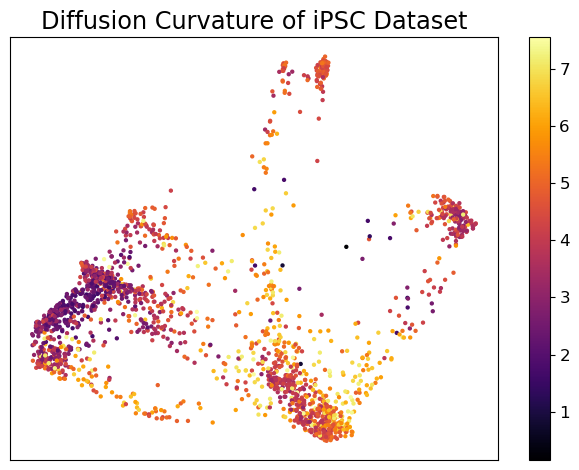

In [9]:
phate.plot.scatter2d(X_phate,c=ks_edc,xticks = False, yticks = False, title="Diffusion Curvature of iPSC Dataset")

Calculating PHATE...
  Running PHATE on 2005 observations and 33 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.21 seconds.
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 0.23 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 0.20 seconds.
    Calculating KMeans...
    Calculated KMeans in 1.67 seconds.
  Calculated landmark operator in 2.18 seconds.
  Calculating optimal t...
    Automatically selected t = 18
  Calculated optimal t in 1.92 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.38 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 1.46 seconds.
Calculated PHATE in 6.18 seconds.

/var/folders/y5/4qfj8yjj1hb97n6q01_dg0km0000gn/T/ipykernel_81687/619123556.py:3: DeprecationWarning: Call to deprecated function (or staticmethod) scatter2d. (Use scprep.plot.scatter2d instead) -- Deprecated since version 1.0.0.
  phate.plot.scatter2d(X_phate,c=ks_edc,xticks = False, yticks = False, title="Diffusion Curvature of Pancreas Dataset")
/Users/adjourner/miniforge3/envs/flowartist/lib/python3.10/site-packages/scprep/plot/utils.py:104: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()

<Axes: title={'center': 'Diffusion Curvature of Pancreas Dataset'}>

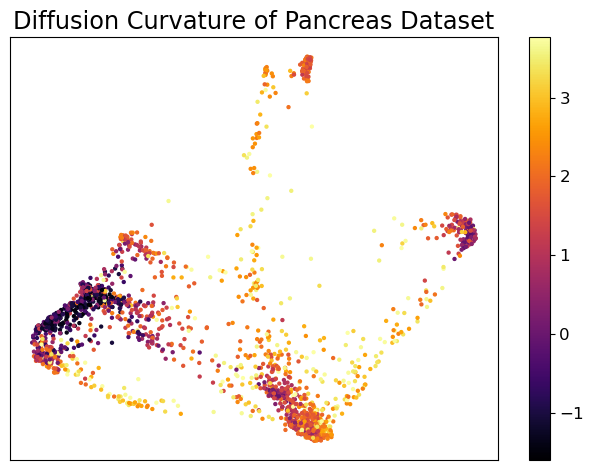

In [10]:
phate_op = phate.PHATE(knn=15,decay=20)
X_phate = phate_op.fit_transform(X)
phate.plot.scatter2d(X_phate,c=ks_edc,xticks = False, yticks = False, title="Diffusion Curvature of iPSC Dataset")

Calculating PHATE...
  Running PHATE on 2005 observations and 33 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.15 seconds.
    Calculating affinities...
  Calculated graph and diffusion operator in 0.16 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 0.22 seconds.
    Calculating KMeans...
    Calculated KMeans in 1.75 seconds.
  Calculated landmark operator in 2.25 seconds.
  Calculating optimal t...
    Automatically selected t = 19
  Calculated optimal t in 2.00 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.41 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 1.44 seconds.
Calculated PHATE in 6.27 seconds.

/var/folders/y5/4qfj8yjj1hb97n6q01_dg0km0000gn/T/ipykernel_81687/393249547.py:3: DeprecationWarning: Call to deprecated function (or staticmethod) scatter2d. (Use scprep.plot.scatter2d instead) -- Deprecated since version 1.0.0.
  phate.plot.scatter2d(X_phate,c=ks_edc,xticks = False, yticks = False, title="Diffusion Curvature of iPSC Dataset")
/Users/adjourner/miniforge3/envs/flowartist/lib/python3.10/site-packages/scprep/plot/utils.py:104: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()

<Axes: title={'center': 'Diffusion Curvature of iPSC Dataset'}>

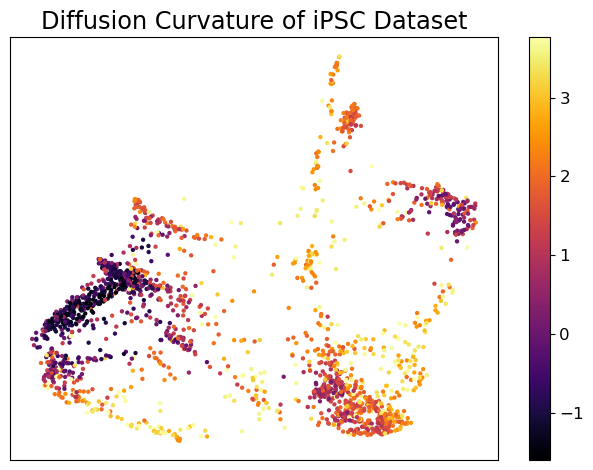

In [12]:
phate_op = phate.PHATE(knn=5,decay=40,)
X_phate = phate_op.fit_transform(X)
phate.plot.scatter2d(X_phate,c=ks_edc,xticks = False, yticks = False, title="Diffusion Curvature of iPSC Dataset")

Calculating PHATE...
  Running PHATE on 2005 observations and 33 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.09 seconds.
    Calculating affinities...
  Calculated graph and diffusion operator in 0.10 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 0.27 seconds.
    Calculating KMeans...
    Calculated KMeans in 22.44 seconds.
  Calculated landmark operator in 22.98 seconds.
  Calculating optimal t...
    Automatically selected t = 20
  Calculated optimal t in 6.80 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.58 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 2.11 seconds.
Calculated PHATE in 32.59 seconds.

/var/folders/y5/4qfj8yjj1hb97n6q01_dg0km0000gn/T/ipykernel_90806/393249547.py:3: DeprecationWarning: Call to deprecated function (or staticmethod) scatter2d. (Use scprep.plot.scatter2d instead) -- Deprecated since version 1.0.0.
  phate.plot.scatter2d(X_phate,c=ks_edc,xticks = False, yticks = False, title="Diffusion Curvature of iPSC Dataset")
/Users/adjourner/miniforge3/envs/flowartist/lib/python3.10/site-packages/scprep/plot/utils.py:104: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()

<Axes: title={'center': 'Diffusion Curvature of iPSC Dataset'}>

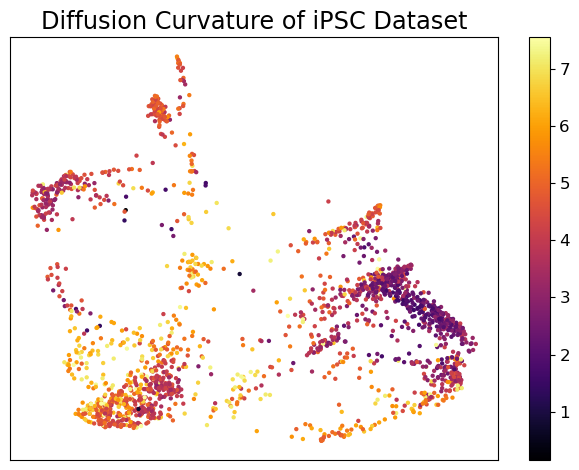

In [9]:
phate_op = phate.PHATE(knn=5,decay=40,)
X_phate = phate_op.fit_transform(X)
phate.plot.scatter2d(X_phate,c=ks_edc,xticks = False, yticks = False, title="Diffusion Curvature of iPSC Dataset")

In [37]:
# Set up the colormap and normalization
import matplotlib.colors as mcolors

cmap = plt.get_cmap('coolwarm')
norm = mcolors.TwoSlopeNorm(vmin=-np.max(np.abs(ks_gl)), vcenter=0, vmax=np.max(np.abs(ks_gl)))


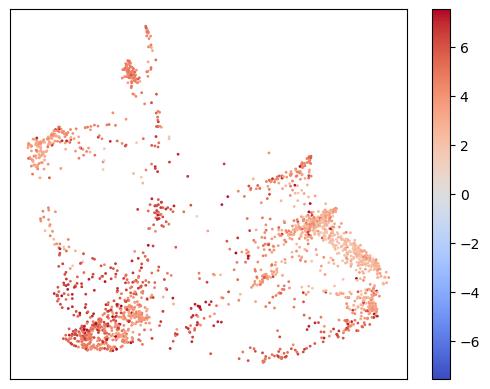

In [45]:
cmap = plt.get_cmap('coolwarm')
norm = mcolors.TwoSlopeNorm(vmin=-np.max(np.abs(ks_edc)), vcenter=0, vmax=np.max(np.abs(ks_edc)))

import matplotlib.pyplot as plt
plt.scatter(X_phate[:,0], X_phate[:,1],c=ks_edc, cmap=cmap, norm=norm, s = 1)
plt.colorbar()
plt.gca().xaxis.set_ticks([])
plt.gca().yaxis.set_ticks([])
plt.show()

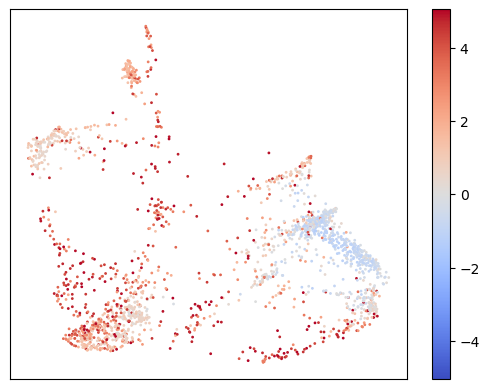

In [44]:
cmap = plt.get_cmap('coolwarm')
norm = mcolors.TwoSlopeNorm(vmin=-np.max(np.abs(ks_gl)), vcenter=0, vmax=np.max(np.abs(ks_gl)))

plt.scatter(X_phate[:,0], X_phate[:,1],c=ks_gl, cmap=cmap, norm=norm, s = 1)
plt.colorbar()
plt.gca().xaxis.set_ticks([])
plt.gca().yaxis.set_ticks([])

plt.show()